# Prepare

**Remeber Goal of project**
- Find drivers of collisions and how to reduce death

**import**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sys
sys.path.append("./util_")
import acquire_
import prepare_

### get data

In [16]:
# get data from acquire file
vehicle = acquire_.get_data()
vehicle.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


## Rename column names

In [17]:
# 1. make every columns lower case
# 2. replace all the spaces with inderscore
vehicle = vehicle.rename(columns=lambda x: x.lower().replace(" ", "_"))

vehicle.head(1)

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN


## Fix column data types

**Object to datetime**

In [18]:
# convert string to datetime
vehicle["crash_date"] = pd.to_datetime(vehicle['crash_date'])
vehicle["crash_time"] = pd.to_datetime(vehicle['crash_time'])

**Float to intiger**

Remove `NaN` in these two columns because the very inssignificant
- `number_of_persons_injured`: 18 rows count
- `number_of_persons_killed`: 31 row count

In [19]:
# removeing all the null columns for number_of_persons_injured and number_of_persons_killed
vehicle = vehicle[vehicle.number_of_persons_injured.notna()]
vehicle = vehicle[vehicle.number_of_persons_killed.notna()]

In [20]:
# change column data type from float to int
vehicle.number_of_persons_injured = vehicle.number_of_persons_injured.astype("int")
vehicle.number_of_persons_killed = vehicle.number_of_persons_killed.astype("int")

In [21]:
vehicle.select_dtypes("number").head(3)

,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id
0,NaN,NaN,2,0,0,0,0,0,2,0,4455765
1,NaN,NaN,1,0,0,0,0,0,1,0,4513547
2,NaN,NaN,0,0,0,0,0,0,0,0,4541903


## Remove columns

remove `location` because it's not tidy and there is also longitude and latitude describing this column.

In [22]:
# drop redundent columns
remove_cols = ["location", "collision_id"]
vehicle = prepare_.drop_cols(vehicle, remove_cols)

Original dataframe size: (2004974, 29)
New dataframe size: (2004974, 27)


## Visualize values counts

Here simply want to visualize my features and understand them better.

LATITUDE
NaN          228720
0.000000       4204
40.861862       844
40.696033       737
40.804700       691
              ...  
40.868220         1
40.737760         1
40.557550         1
40.766550         1
40.865253         1
Name: latitude, Length: 125520, dtype: int64
NaN          1.140763e-01
0.000000     2.096785e-03
40.861862    4.209531e-04
40.696033    3.675858e-04
40.804700    3.446429e-04
                 ...     
40.868220    4.987596e-07
40.737760    4.987596e-07
40.557550    4.987596e-07
40.766550    4.987596e-07
40.865253    4.987596e-07
Name: latitude, Length: 125520, dtype: float64


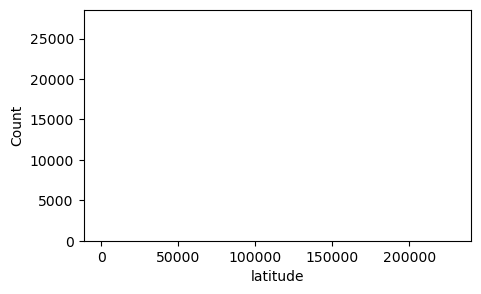

LONGITUDE
 NaN          228720
 0.000000       4204
-73.890630       726
-73.912820       717
-73.984530       698
               ...  
-74.195340         1
-73.911485         1
-73.828297         1
-74.210830         1
-73.805664         1
Name: longitude, Length: 97702, dtype: int64
 NaN          1.140763e-01
 0.000000     2.096785e-03
-73.890630    3.620995e-04
-73.912820    3.576106e-04
-73.984530    3.481342e-04
                  ...     
-74.195340    4.987596e-07
-73.911485    4.987596e-07
-73.828297    4.987596e-07
-74.210830    4.987596e-07
-73.805664    4.987596e-07
Name: longitude, Length: 97702, dtype: float64


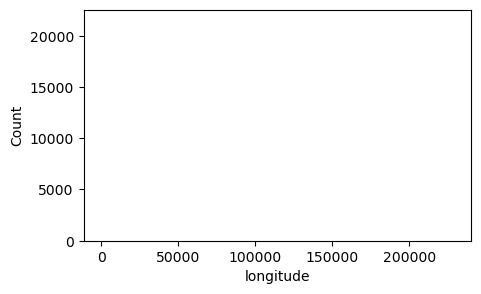

NUMBER_OF_PERSONS_INJURED
0     1560893
1      344641
2       64877
3       21216
4        7884
5        3063
6        1264
7         547
8         236
9         118
10         79
11         46
12         28
13         24
15         10
14          9
16          9
17          5
18          5
19          4
22          3
24          3
20          2
40          1
31          1
27          1
32          1
43          1
21          1
23          1
34          1
Name: number_of_persons_injured, dtype: int64
0     7.785103e-01
1     1.718930e-01
2     3.235803e-02
3     1.058168e-02
4     3.932221e-03
5     1.527701e-03
6     6.304321e-04
7     2.728215e-04
8     1.177073e-04
9     5.885363e-05
10    3.940201e-05
11    2.294294e-05
12    1.396527e-05
13    1.197023e-05
15    4.987596e-06
14    4.488836e-06
16    4.488836e-06
17    2.493798e-06
18    2.493798e-06
19    1.995038e-06
22    1.496279e-06
24    1.496279e-06
20    9.975192e-07
40    4.987596e-07
31    4.987596e-07
27    4.987596e-07


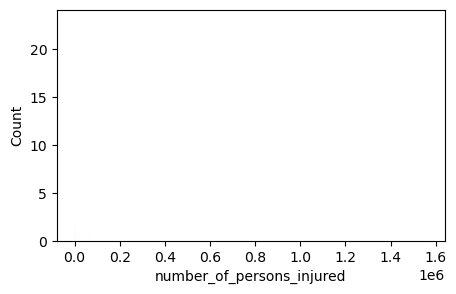

NUMBER_OF_PERSONS_KILLED
0    2002208
1       2679
2         70
3         12
4          3
8          1
5          1
Name: number_of_persons_killed, dtype: int64
0    9.986204e-01
1    1.336177e-03
2    3.491317e-05
3    5.985115e-06
4    1.496279e-06
8    4.987596e-07
5    4.987596e-07
Name: number_of_persons_killed, dtype: float64


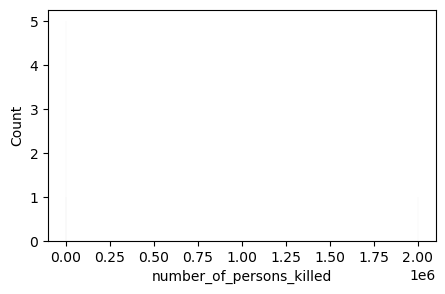

NUMBER_OF_PEDESTRIANS_INJURED
0     1899210
1      101896
2        3421
3         345
4          56
5          25
6          11
7           3
9           2
27          1
13          1
15          1
8           1
19          1
Name: number_of_pedestrians_injured, dtype: int64
0     9.472492e-01
1     5.082161e-02
2     1.706257e-03
3     1.720721e-04
4     2.793054e-05
5     1.246899e-05
6     5.486355e-06
7     1.496279e-06
9     9.975192e-07
27    4.987596e-07
13    4.987596e-07
15    4.987596e-07
8     4.987596e-07
19    4.987596e-07
Name: number_of_pedestrians_injured, dtype: float64


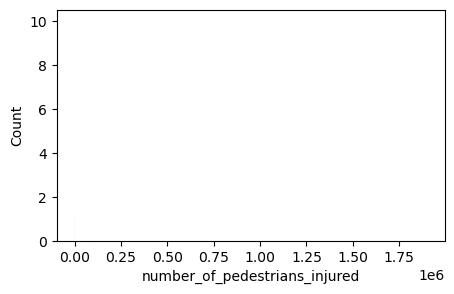

NUMBER_OF_PEDESTRIANS_KILLED
0    2003538
1       1423
2         12
6          1
Name: number_of_pedestrians_killed, dtype: int64
0    9.992838e-01
1    7.097349e-04
2    5.985115e-06
6    4.987596e-07
Name: number_of_pedestrians_killed, dtype: float64


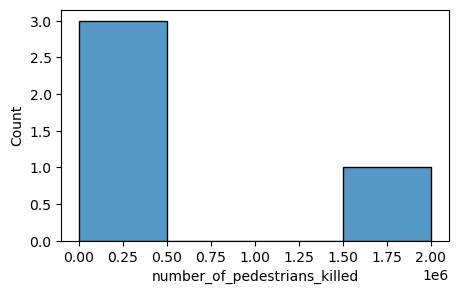

NUMBER_OF_CYCLIST_INJURED
0    1953693
1      50719
2        540
3         21
4          1
Name: number_of_cyclist_injured, dtype: int64
0    9.744231e-01
1    2.529659e-02
2    2.693302e-04
3    1.047395e-05
4    4.987596e-07
Name: number_of_cyclist_injured, dtype: float64


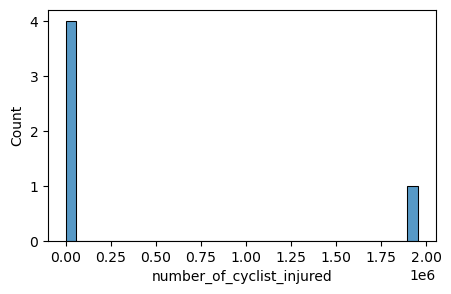

NUMBER_OF_CYCLIST_KILLED
0    2004752
1        221
2          1
Name: number_of_cyclist_killed, dtype: int64
0    9.998893e-01
1    1.102259e-04
2    4.987596e-07
Name: number_of_cyclist_killed, dtype: float64


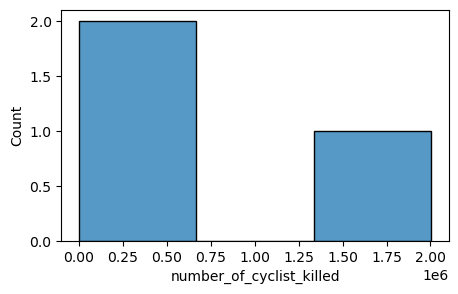

NUMBER_OF_MOTORIST_INJURED
0     1720873
1      191128
2       59330
3       20590
4        7729
5        3013
6        1221
7         523
8         227
9         114
10         77
11         45
12         27
13         24
14         10
16          9
15          8
18          5
17          4
19          3
24          3
20          2
22          2
40          1
21          1
31          1
30          1
43          1
23          1
34          1
Name: number_of_motorist_injured, dtype: int64
0     8.583019e-01
1     9.532692e-02
2     2.959141e-02
3     1.026946e-02
4     3.854913e-03
5     1.502763e-03
6     6.089855e-04
7     2.608513e-04
8     1.132184e-04
9     5.685859e-05
10    3.840449e-05
11    2.244418e-05
12    1.346651e-05
13    1.197023e-05
14    4.987596e-06
16    4.488836e-06
15    3.990077e-06
18    2.493798e-06
17    1.995038e-06
19    1.496279e-06
24    1.496279e-06
20    9.975192e-07
22    9.975192e-07
40    4.987596e-07
21    4.987596e-07
31    4.987596e-07
30    4.9875

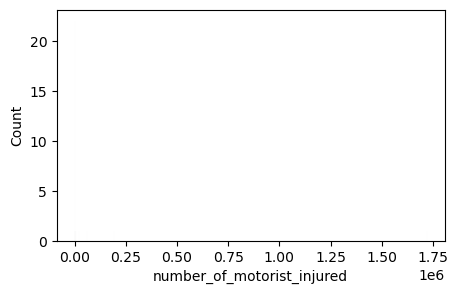

NUMBER_OF_MOTORIST_KILLED
0    2003895
1       1010
2         54
3         12
4          2
5          1
Name: number_of_motorist_killed, dtype: int64
0    9.994618e-01
1    5.037472e-04
2    2.693302e-05
3    5.985115e-06
4    9.975192e-07
5    4.987596e-07
Name: number_of_motorist_killed, dtype: float64


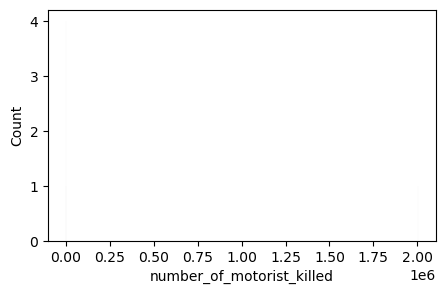

In [11]:
# get all numeric column names
numeric_cols = vehicle.select_dtypes("number").columns

# create numeric columns value counts visuals
for col in numeric_cols:
    
    # print value counts an normalized value counts
    print(col.upper())
    print(vehicle[col].value_counts(dropna=False))
    print(vehicle[col].value_counts(dropna=False, normalize=True))
    
    # show visuals of the value counts
    plt.figure(figsize=(5,3))
    sns.histplot(vehicle[col].value_counts(dropna=False))
    plt.show()

**What I see**

Most of features are continuous variables and distributions are assumed to be normal because I have 2 million rows.

BOROUGH
NaN              623714
BROOKLYN         437860
QUEENS           370064
MANHATTAN        311627
BRONX            203777
STATEN ISLAND     57932
Name: borough, dtype: int64
NaN              0.311083
BROOKLYN         0.218387
QUEENS           0.184573
MANHATTAN        0.155427
BRONX            0.101636
STATEN ISLAND    0.028894
Name: borough, dtype: float64


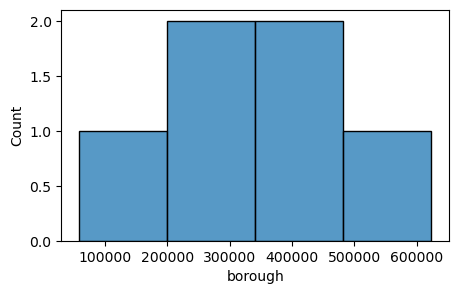

ZIP_CODE
NaN      623952
11207     26654
11101     18580
11236     18395
11203     17705
          ...  
10803         2
11241         1
10166         1
10044         1
10162         1
Name: zip_code, Length: 235, dtype: int64
NaN      3.112020e-01
11207    1.329394e-02
11101    9.266953e-03
11236    9.174683e-03
11203    8.830538e-03
             ...     
10803    9.975192e-07
11241    4.987596e-07
10166    4.987596e-07
10044    4.987596e-07
10162    4.987596e-07
Name: zip_code, Length: 235, dtype: float64


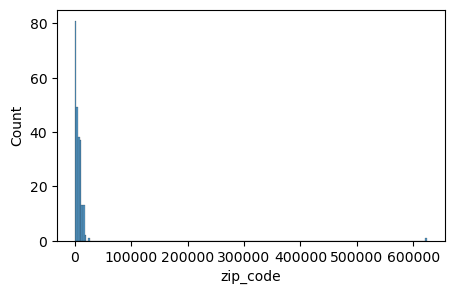

ON_STREET_NAME
NaN                                 420926
BROADWAY                             17276
ATLANTIC AVENUE                      15322
BELT PARKWAY                         13543
3 AVENUE                             12476
                                     ...  
9 AVE                                    1
76 Avenue                                1
E 34 Street                              1
classon ave                              1
NEWBERRY AVENUE                          1
Name: on_street_name, Length: 17902, dtype: int64
NaN                                 2.099409e-01
BROADWAY                            8.616571e-03
ATLANTIC AVENUE                     7.641994e-03
BELT PARKWAY                        6.754701e-03
3 AVENUE                            6.222525e-03
                                        ...     
9 AVE                               4.987596e-07
76 Avenue                           4.987596e-07
E 34 Street                         4.987596e-07
classon ave          

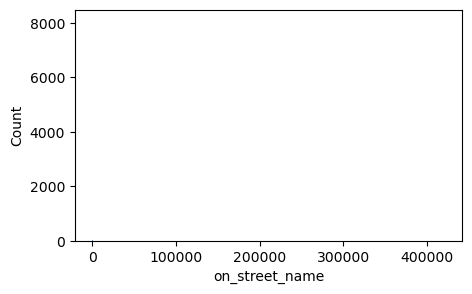

CROSS_STREET_NAME
NaN                                 748567
3 AVENUE                              9843
BROADWAY                              9685
2 AVENUE                              8421
5 AVENUE                              7051
                                     ...  
72 ave                                   1
HOLLAND TUNNEL ENTRANCE                  1
BARRETTO ST                              1
72 STREET                                1
Beach 116 Street                         1
Name: cross_street_name, Length: 19991, dtype: int64
NaN                                 3.733550e-01
3 AVENUE                            4.909291e-03
BROADWAY                            4.830487e-03
2 AVENUE                            4.200054e-03
5 AVENUE                            3.516754e-03
                                        ...     
72 ave                              4.987596e-07
HOLLAND TUNNEL ENTRANCE             4.987596e-07
BARRETTO ST                         4.987596e-07
72 STREET      

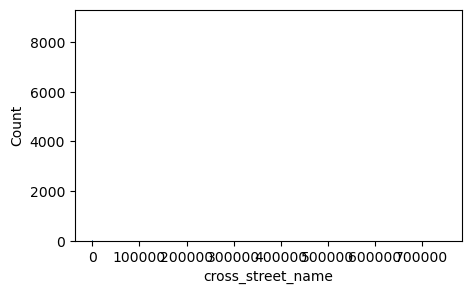

OFF_STREET_NAME
NaN                                         1676418
772       EDGEWATER ROAD                        402
110-00    ROCKAWAY BOULEVARD                    261
2800      VICTORY BOULEVARD                     236
2655      RICHMOND AVENUE                       169
                                             ...   
1796      EAST 53 STREET                          1
345       BAINBRIDGE STREET                       1
1922      AVENUE U                                1
1119      UNDERHILL AVENUE                        1
789       ADEE AVENUE                             1
Name: off_street_name, Length: 212710, dtype: int64
NaN                                         8.361295e-01
772       EDGEWATER ROAD                    2.005014e-04
110-00    ROCKAWAY BOULEVARD                1.301763e-04
2800      VICTORY BOULEVARD                 1.177073e-04
2655      RICHMOND AVENUE                   8.429037e-05
                                                ...     
1796      EAST 53 

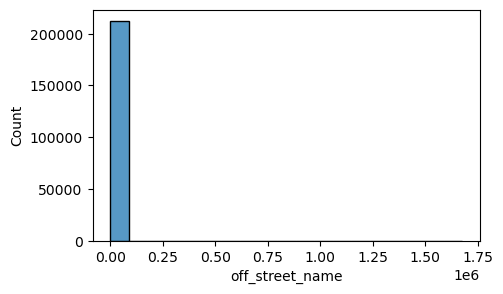

CONTRIBUTING_FACTOR_VEHICLE_1
Unspecified                       689404
Driver Inattention/Distraction    397999
Failure to Yield Right-of-Way     118376
Following Too Closely             106608
Backing Unsafely                   74658
                                   ...  
Cell Phone (hand-held)                79
Windshield Inadequate                 77
Texting                               50
Listening/Using Headphones            24
1                                     10
Name: contributing_factor_vehicle_1, Length: 62, dtype: int64
Unspecified                       0.343847
Driver Inattention/Distraction    0.198506
Failure to Yield Right-of-Way     0.059041
Following Too Closely             0.053172
Backing Unsafely                  0.037236
                                    ...   
Cell Phone (hand-held)            0.000039
Windshield Inadequate             0.000038
Texting                           0.000025
Listening/Using Headphones        0.000012
1                          

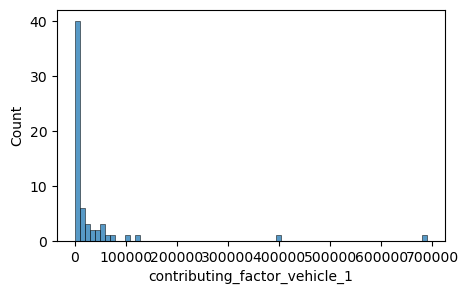

CONTRIBUTING_FACTOR_VEHICLE_2
Unspecified                       1431312
NaN                                304996
Driver Inattention/Distraction      91088
Other Vehicular                     31203
Following Too Closely               18197
                                   ...   
Eating or Drinking                     10
Listening/Using Headphones             10
Windshield Inadequate                   7
1                                       5
Texting                                 3
Name: contributing_factor_vehicle_2, Length: 62, dtype: int64
Unspecified                       0.713881
NaN                               0.152120
Driver Inattention/Distraction    0.045431
Other Vehicular                   0.015563
Following Too Closely             0.009076
                                    ...   
Eating or Drinking                0.000005
Listening/Using Headphones        0.000005
Windshield Inadequate             0.000003
1                                 0.000002
Texting         

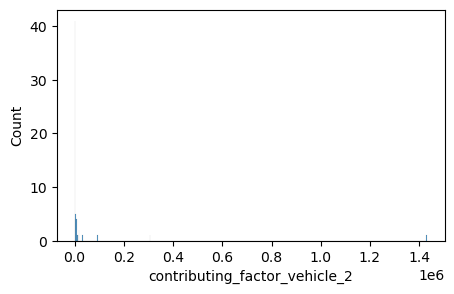

CONTRIBUTING_FACTOR_VEHICLE_3
NaN                                                      1863082
Unspecified                                               132305
Other Vehicular                                             2636
Driver Inattention/Distraction                              1868
Following Too Closely                                       1835
Fatigued/Drowsy                                              853
Pavement Slippery                                            380
Reaction to Uninvolved Vehicle                               199
Driver Inexperience                                          174
Outside Car Distraction                                      159
Traffic Control Disregarded                                  151
Unsafe Speed                                                 146
Failure to Yield Right-of-Way                                141
Passing or Lane Usage Improper                               102
Alcohol Involvement                                         

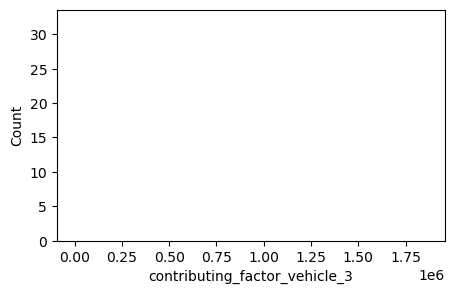

CONTRIBUTING_FACTOR_VEHICLE_4
NaN                                            1973177
Unspecified                                      30010
Other Vehicular                                    569
Following Too Closely                              363
Driver Inattention/Distraction                     264
Fatigued/Drowsy                                    170
Pavement Slippery                                  110
Reaction to Uninvolved Vehicle                      39
Driver Inexperience                                 27
Outside Car Distraction                             27
Unsafe Speed                                        27
Traffic Control Disregarded                         22
Obstruction/Debris                                  20
Alcohol Involvement                                 19
Fell Asleep                                         19
Failure to Yield Right-of-Way                       16
Passing or Lane Usage Improper                      12
Backing Unsafely                   

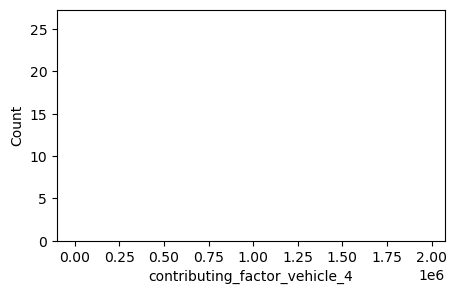

CONTRIBUTING_FACTOR_VEHICLE_5
NaN                                            1996394
Unspecified                                       8091
Other Vehicular                                    163
Following Too Closely                               89
Driver Inattention/Distraction                      63
Pavement Slippery                                   47
Fatigued/Drowsy                                     41
Reaction to Uninvolved Vehicle                      11
Alcohol Involvement                                 10
Driver Inexperience                                 10
Unsafe Speed                                         9
Obstruction/Debris                                   8
Outside Car Distraction                              7
Failure to Yield Right-of-Way                        5
Traffic Control Disregarded                          4
Fell Asleep                                          3
Drugs (illegal)                                      2
Passing Too Closely                

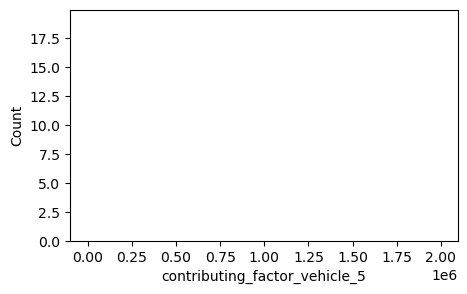

VEHICLE_TYPE_CODE_1
Sedan                                  544624
Station Wagon/Sport Utility Vehicle    429111
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    49660
                                        ...  
pay loader                                  1
tractor tr                                  1
FDNY EMS V                                  1
OMS                                         1
Ford FF                                     1
Name: vehicle_type_code_1, Length: 1540, dtype: int64
Sedan                                  2.716364e-01
Station Wagon/Sport Utility Vehicle    2.140232e-01
PASSENGER VEHICLE                      2.075867e-01
SPORT UTILITY / STATION WAGON          8.992186e-02
Taxi                                   2.476840e-02
                                           ...     
pay loader                             4.987596e-07
tractor tr                             4.987596e-07
FDNY

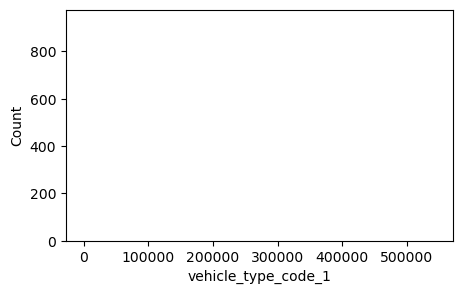

VEHICLE_TYPE_CODE_2
Sedan                                  385291
NaN                                    372733
PASSENGER VEHICLE                      318607
Station Wagon/Sport Utility Vehicle    312558
SPORT UTILITY / STATION WAGON          140204
                                        ...  
LADDER TRU                                  1
Chevy                                       1
EMT                                         1
freight To                                  1
police van                                  1
Name: vehicle_type_code_2, Length: 1703, dtype: int64
Sedan                                  1.921676e-01
NaN                                    1.859042e-01
PASSENGER VEHICLE                      1.589083e-01
Station Wagon/Sport Utility Vehicle    1.558913e-01
SPORT UTILITY / STATION WAGON          6.992809e-02
                                           ...     
LADDER TRU                             4.987596e-07
Chevy                                  4.987596e-07
EMT 

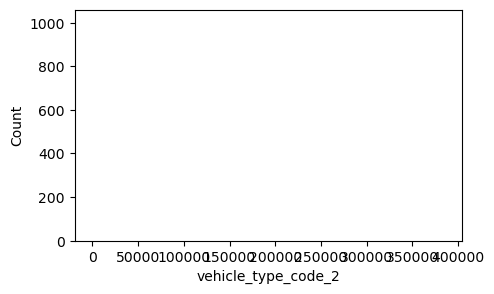

VEHICLE_TYPE_CODE_3
NaN                                    1867992
Sedan                                    41602
Station Wagon/Sport Utility Vehicle      33708
PASSENGER VEHICLE                        27713
SPORT UTILITY / STATION WAGON            13358
                                        ...   
BUs                                          1
tank                                         1
USPS POSTA                                   1
POSTA                                        1
SUBURBAN                                     1
Name: vehicle_type_code_3, Length: 244, dtype: int64
NaN                                    9.316789e-01
Sedan                                  2.074940e-02
Station Wagon/Sport Utility Vehicle    1.681219e-02
PASSENGER VEHICLE                      1.382212e-02
SPORT UTILITY / STATION WAGON          6.662431e-03
                                           ...     
BUs                                    4.987596e-07
tank                                   4.98759

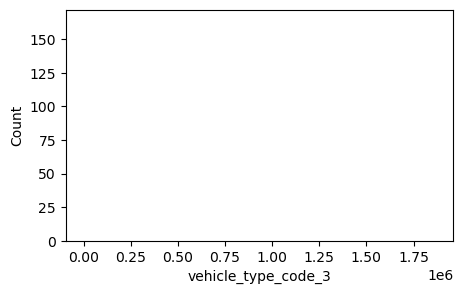

VEHICLE_TYPE_CODE_4
NaN                                    1974238
Sedan                                    10032
Station Wagon/Sport Utility Vehicle       8179
PASSENGER VEHICLE                         5969
SPORT UTILITY / STATION WAGON             2852
                                        ...   
TRAIL                                        1
Deliv                                        1
TOW T                                        1
trail                                        1
RV motorho                                   1
Name: vehicle_type_code_4, Length: 99, dtype: int64
NaN                                    9.846701e-01
Sedan                                  5.003556e-03
Station Wagon/Sport Utility Vehicle    4.079355e-03
PASSENGER VEHICLE                      2.977096e-03
SPORT UTILITY / STATION WAGON          1.422462e-03
                                           ...     
TRAIL                                  4.987596e-07
Deliv                                  4.987596

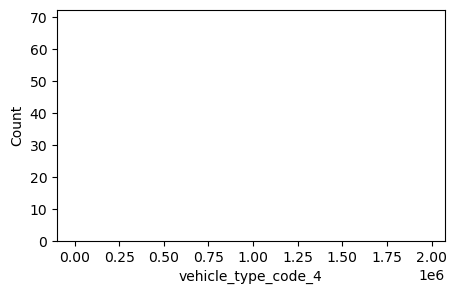

VEHICLE_TYPE_CODE_5
NaN                                    1996649
Sedan                                     2809
Station Wagon/Sport Utility Vehicle       2327
PASSENGER VEHICLE                         1487
SPORT UTILITY / STATION WAGON              802
                                        ...   
TRK                                          1
dump                                         1
OML                                          1
Flat Rack                                    1
Concrete Mixer                               1
Name: vehicle_type_code_5, Length: 67, dtype: int64
NaN                                    9.958478e-01
Sedan                                  1.401016e-03
Station Wagon/Sport Utility Vehicle    1.160614e-03
PASSENGER VEHICLE                      7.416555e-04
SPORT UTILITY / STATION WAGON          4.000052e-04
                                           ...     
TRK                                    4.987596e-07
dump                                   4.987596

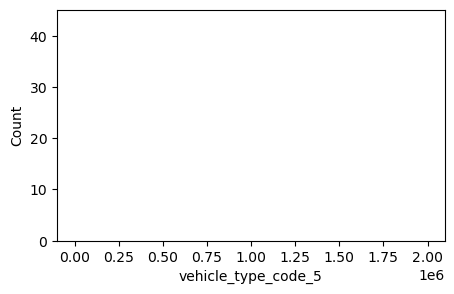

In [12]:
# get all object column names
object_cols = vehicle.select_dtypes("object").columns

# create object columns value counts visuals
for col in object_cols:
    
    # print value counts an normalized value counts
    print(col.upper())
    print(vehicle[col].value_counts(dropna=False))
    print(vehicle[col].value_counts(dropna=False, normalize=True))
    
    # show visuals of the value counts
    plt.figure(figsize=(5,3))
    sns.histplot(vehicle[col].value_counts(dropna=False))
    plt.show()
    

## Encode categorical variable

In [24]:
# get all columns from dataframe
all_columns = vehicle.columns

# containers of different variable types
categorical = []

# separate variables
for col in all_columns:
    # count number of unique valus in the column
    len_of_uniq = len(vehicle[col].unique())
    
    # also checking for only object data types
    if (col != "churn") and (len_of_uniq <= 5) and (vehicle[col].dtype == "O"):
        categorical.append(col)
    else: pass
        
categorical

[]

## Split data